Nesse notebook estarei fazendo uns testes relacionados com visão computacional.

- Quero testar uns shaps, pipelines, objetos e hiperparametros.
https://www.mrdbourke.com/6-techniques-which-help-me-study-machine-learning-five-days-per-week/

Entendendo o problema. A primeira coisa a se analisar, é se meu problema é linearmente separavel.

Linearmente separavel, significa que meu problema é relativamente simples, de forma que eu posso utilizar camadas de neuronios lineares, sem a necessidade de uma função de ativação para cada saida de neuronio.
Isso significa que meus neuronios apenas vão fazer multiplicações entre si,

Quando você não aplica uma função de ativação após a última camada linear em um problema de classificação multiclasse, o modelo produzirá o que é chamado de "logits" para cada classe. Logits são as pontuações brutas ou valores de saída antes de aplicar uma função de ativação.


Hiperparams:

input image

input layer -> input shape = []

conv layer -> torch.nn.Conv2d()

hidden activation/non-linear activation -> torch.nn.ReLU()

pooling layer -> torch.nn.MaxPool2d()

output layer/linear layer -> torch.nn.Linear()

output activation -> torch.sigmoid()

E será utilizado:

torchvision.datasets -> pegar datasets e data loading functions

torchvision.models -> modelos pre treinados

torchvision.transforms -> funções para manipulação de imagens -> transformar imagens em tensor por exemplo

torch.utils.data.Dataset -> base dataset class for pytorch

torch.utils.data.DataLoader -> criar um iteravel do python em um dataset

dataset fashion mnist -> the basics

we can download from github

https://www.image-net.org/

https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html


https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

https://pytorch.org/vision/stable/index.html



In [ ]:
import torch
from torch import nn

import torchvision

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 2.6 MB/s eta 0:00:00


In [ ]:
#ADQUIRINDO MEU DATASET

from torchvision import datasets
#basta seguir a documentação.
train_data = datasets.FashionMNIST(
    root = "data",
    train = True, #we want the training dataset, not the test
    download = True,
    transform = torchvision.transforms.ToTensor(), # como transformar os dados
    target_transform = None # we dont want to transform the labels
)

test_data = datasets.FashionMNIST(
    root= "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

#pytroch comes with a tqm module

100%|██████████| 26421880/26421880 [00:01<00:00, 15038928.37it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274086.84it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5141265.61it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14442994.64it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
#training exemple

image, label = train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
 label

9

In [ ]:
class_names = train_data.classes
class_names
#len(class_names)

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx


{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image.shape, label


(torch.Size([1, 28, 28]), 9)

In [ ]:
print(f"Image shape: {image.shape} -> [color chanels, height, width]")
print(f"image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color chanels, height, width]
image label: Ankle boot


#visualization
Matplotlib sempre espera que o ultimo valor seja o canal de cores. entretanto o pytorch espera que esse seja o primeiro valor: Por isso precisamos fazer o squeeze

image shape: torch.Size([1, 28, 28])


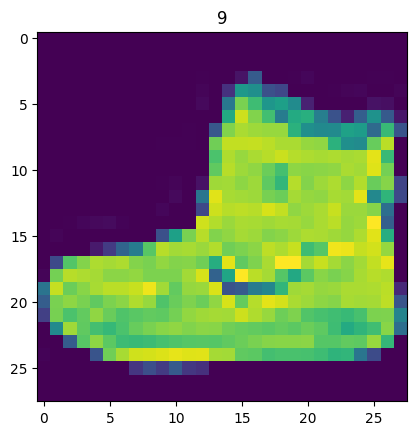

In [ ]:
import matplotlib.pyplot as plt
image_label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label); # label 9

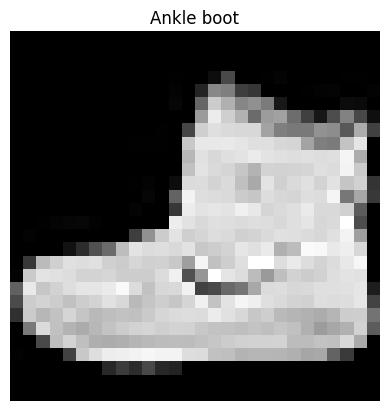

In [ ]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label]);
plt.axis(False); # ; pois eu não quero ver os valores do eixo


37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


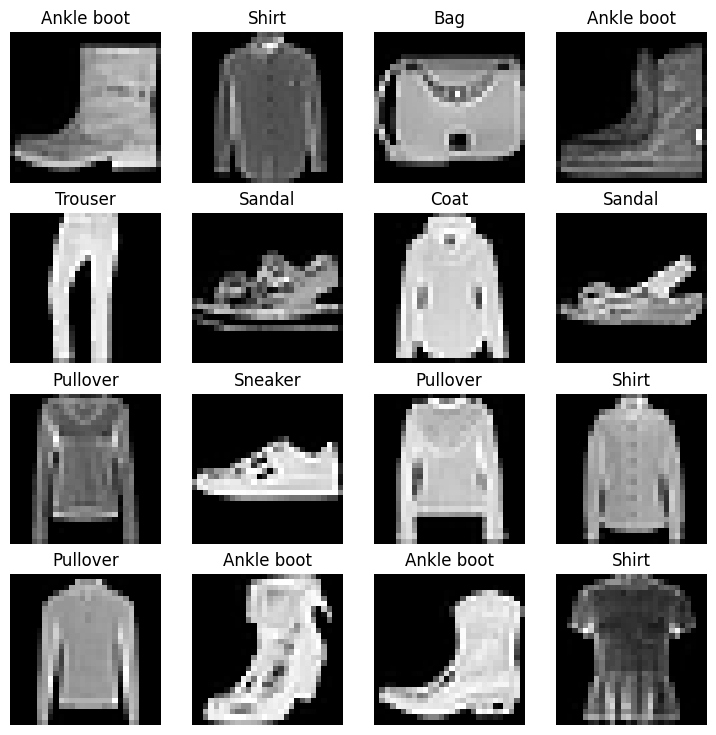

In [ ]:
#showing all images
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

transformar em mini batches, em um iteravel de python:

É pra eficiencia de loop e para eficiancia de otimização do gradiente por epoch

6000/32

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True) #shuffle só serve pra remover a ordem


test_dataloader = DataLoader(dataset=test_data,
                               batch_size=BATCH_SIZE,
                               shuffle=False) #é mais facil se no test ele não for embaralhado, mais facil pra gente verificar depois

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7ce43bc37df0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ce43bc347c0>)

In [ ]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

#(60000, 10000) /32

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ce43bc37df0>, <torch.utils.data.dataloader.DataLoader object at 0x7ce43bc347c0>)
length of train_dataloader: 1875 batches of 32
length of test_dataloader: 313 batches of 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape
#32 samples, 1 color chanel, height, width.
#32 labels associadas com 32 samples

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
label: 8, label size: torch.Size([])


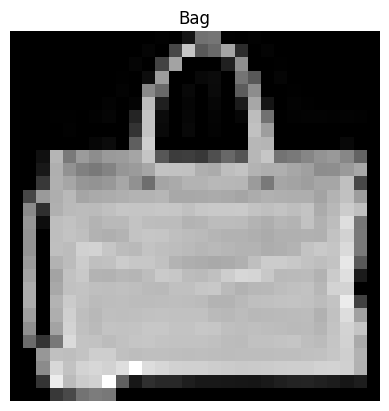

In [ ]:
#interact with dataloader
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

In [ ]:
#model
#https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html

flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape
output = flatten_model(x) #forward pass
print(f"shape before flattening: {x.shape} -> [color_chanels, height, width]")
print(f"shape after flattening: {output.shape} -> [color, height*width] ")
#28*28 = 784 and it is at one dimension

shape before flattening: torch.Size([1, 28, 28]) -> [color_chanels, height, width]
shape after flattening: torch.Size([1, 784]) -> [color, height*width] 


uso init, construtor, preciso passar a forma das entradas e das saidas.

crio meu objeto depois só passo os valores.

Sequential define que eu vou passar layer por layer .

Meus hidden_units são simplesmente quantos neuronios eu estou fazendo.

Então vamos devagar:

Minha camada flatten apenas transforma os dados em um vetor unidimensional.
Os neuronios são adicionados pela minha minha camada Linear.Que no caso são exatos 10 neuronios.

Em seguidas esses 10 neuronios vão comunicar com a minha segunda camada Linear que vai receber a saida e enviar a resposta.

Basicamente são 2 camadas de 10 neuronios em coluna, sendo 10 neuronios na primeira, que comunicam com os neuronios da segunda segunda camada linear, que me enviam a resposta. Nesse caso 10 neuronios também.



Com base nessa rede, eu estou definindo 10 neuronios em cada camada. mas é minha camada nn.linear que cria de fato as 2 camadas de 10 neuronios.
Então basicamente minha camada de flatten apenas prepara os dados para seguirem para esses 10 neuronios iniciais, que depois vão seguir para os próximos neuronios.

nn.Linear() seria criar uma camada densa, conecta as camadas fazendo a transformação linear.
pega os dados de entrada, multiplica pelos pesos, e produz os valores de saida. cada saida vai ser a ativação de um neuronio dessa camada

In [ ]:
#utilizo objeto, defino input shape e os outros como variavel e já informo o tipo deles.
#fashionmnist hearda do nn.Module
#como eu estou herdando, eu utilizo o super() pra fazer a chamada. Estou chamando O construtor da classe pai nn.module garantindo que todos iniciadores definidos em nn.module também estejam no meu modelo
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super(). __init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=28*28, #esse é o formato certo de passar,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [ ]:
# 3.1 loss, optimizer, evaluation
#vou importar metricas de uma forma interessante
#importando biblioteca de outros arquivos.py
#abrir o arquivo raw, copiar o link
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("downloading")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


downloading


In [ ]:
#loss function - nn.CrossEntropyLoss()
#optimizer -> torch.optmim.sgd()
#da pra utilizar metricas

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
#track performance

from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ diferrence between start and end time """
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time



In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


4.993400000330439e-05

In [ ]:
#lembrando que o optimizer faz o update nos parametros do modelo uma vez por batch, não uma vez por epoch.
#loop through training batches, traning steps and loss per batch
#loop through testing batches, test steps and loss per batch

In [ ]:
#o tqdm.auto já conhece que eu estou rodando em jupyter
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()
#epochs
epochs = 3
#training and test loop
for epoch in tqdm (range(epochs)):
  print(f"Epoch: {epoch} \n---")
#training
  train_loss = 0
  # x= images, y = label. Usa o enumerate pq eu preciso saber em qual batch ele esta
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #forward pass
    y_pred = model_0(X)
    #calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # o loss é sempre acumulado o programa esta feito nessa arch
    #optimizer zero grad
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #optimizer step
    optimizer.step()

    #basicamente se a ideia é atualizar a cada pacote, eu preciso conseguir visualizar essa atualização
    #para isso, eu preciso multiplicar a quantidade amostras pelo tamanho da imagem
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  #divide total train loss by lenght of train dataloader
  train_loss /= len(train_dataloader) #eu acumulei esse erro no pacote, eu preciso tirar uma media, isso que fiz
  #testing loop
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #forward pass
      test_pred = model_0(X_test) #essas saidas vão ser todas logits como previsto
      #calculate the loss
      test_loss += loss_fn(test_pred, y_test)

      #calculate accuracy -> eu uso o argmax pq essa funcao espera que o y_true e o y_pred estejam no mesmo formato, o que cai no problema do logit
      #com isso eu encontro o valor com o maior index, e esse vai ser meu label. então eu comparo label com label

      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    #calculate the test loss average per batch
    test_loss /= len(test_dataloader) #o mesmo esquema, eu preciso pegar a media dos valores
    #calculate the test acc average per abtch
    test_acc /= len(test_dataloader) #mesmo caso, preciso pegar a media..

  print(f"\nTrain loss: {train_loss: .4f} | test loss: {test_loss:.4f}, test acc:{test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
---
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.5904 | test loss: 0.5095, test acc:82.0387
Epoch: 1 
---
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4763 | test loss: 0.4799, test acc:83.1969
Epoch: 2 
---
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4550 | test loss: 0.4766, test acc:83.4265
Train time on cpu: 50.341 seconds


In [ ]:
#next(model_0.parameters().device())

In [ ]:
#PREDICTIONS

torch.manual_seed(42)
def eval_mode(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            #predict
            y_pred = model(X)
            #accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

            #scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_0_results = eval_mode(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
#testes em gpu
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

# NOVO MODELO !!

Nesse modelo eu ainda terei 10 neuronios, eu já conheço meu modelo, sei que vão ter 28*28 dados de entrada da minha image.shape

ReLU introduz não lineariedades na rede.

gera não saturação de dados como a sigmoid, não desaparece o gradiente com o treino.

Interessante contra overfitting

Classificação => numero de neuronios é o mesmo numero de classes do conjunto de dados, junto com uma função de ativação para gerar probabilidades para cada classe (sofmax por exemplo), além disso a relu também confirma que é uma classificação.

interessante pensar que eu posso realizar classificação atravez de features, não precisa necessariamente realizar convoluções. Eu posso simplesmente utilizar camadas densas, aplicar uma trasnformação linear por ativações relu e objter um resultado sem classificação explicita


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
#model with non-linearity
#testing the 2 possibilities

#using relu
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super(). __init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)



In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
device

'cpu'

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) #sendo to the gpu
next(model_1.parameters()).device


device(type='cpu')

In [ ]:
#avaliar o modelo com loss, accuracy, mover para o gpu
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# TRANSFORMING INTO FUNCTIONS
from helper_functions import accuracy_fn

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):


  train_loss, train_acc = 0, 0

  model.train()

  for batch, (X,y) in enumerate(data_loader):

    X,y = X.to(device), y.to(device)
    #forward pass, problema com os logits
    y_pred = model(X)
    #calculate the loss and accuracy per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # o loss é sempre acumulado o programa esta feito nessa arch
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) #from logits to prediction labels
    #optimizer zero grad
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #optimizer step
    optimizer.step()

    #basicamente se a ideia é atualizar a cada pacote, eu preciso conseguir visualizar essa atualização
    #para isso, eu preciso multiplicar a quantidade amostras pelo tamanho da imagem


  #divide total train loss and accuracy by lenght of train dataloader
  train_loss /= len(data_loader) #eu acumulei esse erro no pacote, eu preciso tirar uma media, isso que fiz
  train_acc /= len(data_loader)
  print(f"Train loos: {train_loss:.5f} | train acc: {train_acc: .2f}% \n")


In [ ]:
from helper_functions import accuracy_fn
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """ performs a trining step with model tryin to learn on data_loader."""
  #testing loop
  test_loss, test_acc = 0,0
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X,y = X.to(device), y.to(device)

      #forward pass
      test_pred = model(X) #essas saidas vão ser todas logits como previsto
      #calculate the loss
      test_loss += loss_fn(test_pred, y)

      #calculate accuracy -> eu uso o argmax pq essa funcao espera que o y_true e o y_pred estejam no mesmo formato, o que cai no problema do logit
      #com isso eu encontro o valor com o maior index, e esse vai ser meu label. então eu comparo label com label

      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) #logits to prediction labels

    #calculate the test loss average per batch
    test_loss /= len(data_loader) #o mesmo esquema, eu preciso pegar a media dos valores
    #calculate the test acc average per abtch
    test_acc /= len(data_loader) #mesmo caso, preciso pegar a media..

  print(f"\n test loss: {test_loss: .5f} | test acc:{test_acc:.2f}%\n")




In [ ]:
from helper_functions import accuracy_fn
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()
epoch = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)


train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loos: 1.09199 | train acc:  61.34% 


 test loss:  0.95636 | test acc:65.00%

Epoch: 1
-----
Train loos: 0.78101 | train acc:  71.93% 


 test loss:  0.72227 | test acc:73.91%

Epoch: 2
-----
Train loos: 0.67027 | train acc:  75.94% 


 test loss:  0.68500 | test acc:75.02%

Train time on cpu: 36.550 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0
#feito para comparar o tempo entre os treinos de gpu e cpu !!

50.341266303

In [ ]:
#eu quero modificar meu codigo para que eu não tenha problemas ao passar em um dicionario.. pra isso eu coloc tudo no mesmo device

torch.manual_seed(42)
def eval_mode(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device=device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            #preciso fazer que os dados não tenho problemas de mismatches quando eu for jogar em um dicionario. Eu quero todos os arquivos no mesmo device.
            X,y = X.to(device), y.to(device)
            #predict
            y_pred = model(X)
            #accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

            #scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}



In [ ]:
#get the results in a dictionary
#device mismatch
model_1_results = eval_mode(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# NOVO MODELO
#MODELV2
model 2:  CNN -> tinyvgg
image, processes input, conv layer, relu, pooling, conv layer, relu, pooling.. -> linear output layer

 Eu não começo com uma flatten, pois a camada conv2d já espera na sua entrada.

 sem a não linearidade criada pela relu, as camadas convolucionais e lineares em série podem ser simplificadas em uma única camada linear, isso tornaria a rede mais burra.

Eu poderia trocar a ordem da minha ReLu e da minha maxpool. Apenas mediante experimentações podemos saber a melhor ordem possível.

#https://poloclub.github.io/cnn-explainer

In [ ]:
/

#https://www.google.com/search?q=popular+cnn+architectures&oq=popular+cnn+architectures&gs_lcrp=EgZjaHJvbWUqBggAEEUYOzIGCAAQRRg70gEHMzc1ajBqMagCALACAA&sourceid=chrome&ie=UTF-8

class FashionMNISTModelV2(nn.Module):
  """tiny vgg """

#hiperparams
#test conv3d soon
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2= nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, #essa é uma adição para que ele funcione. O valor do 7*7 vem da camada anterior, o flatten
                  out_features=output_shape)
    )

#truque para descobrir o tamanho da minha saida.
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"output shape of conv_block_1: {x.shape}")
    x=self.conv_block_2(x)
    #print(f"output shape of conv_block_2: {x.shape}")
    x=self.classifier(x) #se não mostrar meu classifier significa que eu tenho um problema nele
    #print(f"output shape of classifier: {x.shape}")
    return x

#algums problemas de multiplicação de matrizes podem ocorrer no meu x=self.classifier(x)
# isso significa que eu preciso verficiar se as matrizes são multiplicaveis em cada etapa.
#10*7*7 = 490
#é possível obter os resultados dos tamanhos ao utilizar a documentação do nn.conv2d, fazendo o Hout e o Wout
#meu forward propagation com os shapes fica muito mais tranquilo



In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # nesse caso é apenas 1 pois minha camada inicial vai ser a conv2d, e ela ao receber esse 1, vai receber ele como numero de canais de cores.
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
#pass image through model
#model_2(rand_image_tensor.unsqueeze(0).to(device))

In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
image.shape

torch.Size([1, 28, 28])

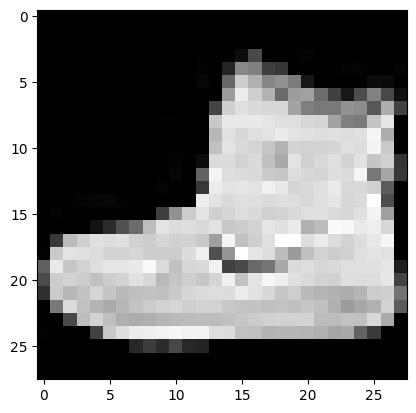

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
#understanding conv2d
#https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"image batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"test image: {test_image}")



image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [ ]:
#aqui so estarei verificando o que minha conv2d recebe e no que isso se transofrma

#single conv2d layer
#3 chanels -> color chanels.
#out channels = hidden units
#kernel = filter
#stride = steps
#padding = filling kernel
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                        out_channels=10,
                        kernel_size=3,
                        stride=1,
                        padding=0)

#pass the data

conv_output = conv_layer(test_image)
conv_output.shape



torch.Size([10, 62, 62])

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
#nowdays pytorch has already a unsqueeze method, so our conv_output was shown as normal.
#entretanto o comum seria um problema de shapes,pois ele espera um 4-dimensional tensor
conv_output= conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191, -

In [ ]:
conv_output.shape

torch.Size([1, 10, 62, 62])

In [ ]:
#vendo agora o max pool -> maximo valor do kerel
# 10 hidden units
# 64,64 é graças ao kernel e ao meu padding e ao meu stride.
#meu max pooling obviamente reduz meu tamanho de 62 para 31 pois eu setei meu kernel size para 2x2

print(f"test image original shape: {test_image.shape}")
print(f"test image with unsqueezes dimension: {test_image.unsqueeze(0).shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going trough conv_layer(): {test_image_through_conv.shape} ")

test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"shape after going through conv_layer and max pool_layer(): {test_image_through_conv_and_max_pool.shape}")


test image original shape: torch.Size([3, 64, 64])
test image with unsqueezes dimension: torch.Size([1, 3, 64, 64])
shape after going trough conv_layer(): torch.Size([1, 10, 62, 62]) 
shape after going through conv_layer and max pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
#replicando o maxpool

torch.manual_seed(42)

random_tensor = torch.randn(size = (1,1,2,2))
print(f"\n random tensor:\n {random_tensor}")
print(f" random tensor shape: {random_tensor.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor=max_pool_layer(random_tensor)
print(f"max pool tensor: {max_pool_tensor}")
print(f"max pool tensor shape: {max_pool_tensor.shape}")


 random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
 random tensor shape: torch.Size([1, 1, 2, 2])
max pool tensor: tensor([[[[0.3367]]]])
max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
#loss function and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loos: 0.59518 | train acc:  78.38% 


 test loss:  0.39500 | test acc:85.99%

Epoch: 1
-------
Train loos: 0.36536 | train acc:  86.90% 


 test loss:  0.35244 | test acc:86.91%

Epoch: 2
-------
Train loos: 0.32588 | train acc:  88.13% 


 test loss:  0.32719 | test acc:88.07%

Train time on cpu: 179.353 seconds


In [ ]:
 !nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
model_2_results = eval_mode(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

#COMPARANDO SO 3 MODELOS


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,50.341266
1,FashionMNISTModelV1,0.685001,75.019968,36.550297
2,FashionMNISTModelV2,0.327190,88.069089,179.353278


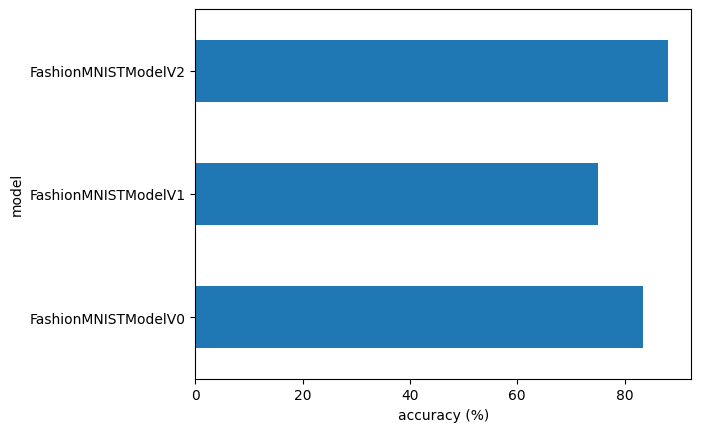

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations cause we are using matplot lib (works on cpu)
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:

import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Trouser')

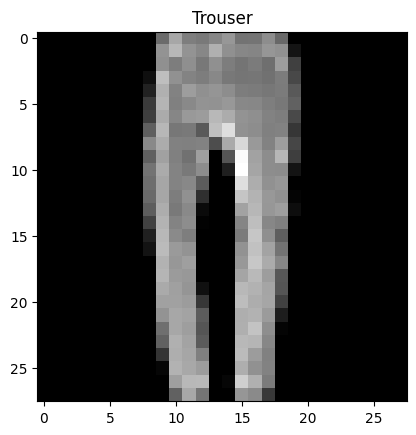

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:

# Make predictions from samples
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.2514e-04, 9.9961e-01, 1.7615e-06, 1.1047e-04, 6.0671e-05, 3.3357e-05,
         3.4889e-05, 1.4960e-06, 1.8469e-05, 5.8405e-07],
        [2.7193e-04, 9.9880e-01, 6.6562e-06, 8.6681e-04, 2.6725e-05, 1.8689e-06,
         1.1189e-05, 4.2186e-06, 4.9081e-06, 1.7374e-06]])

In [ ]:
#preciso converter os valores encontrados e encaixar eles em suas possíveis labels, pra isso, utilizo o argmax !!
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 1, 2, 0, 9, 6, 2, 7, 9])

In [ ]:
test_labels


[1, 1, 2, 0, 9, 4, 6, 7, 9]

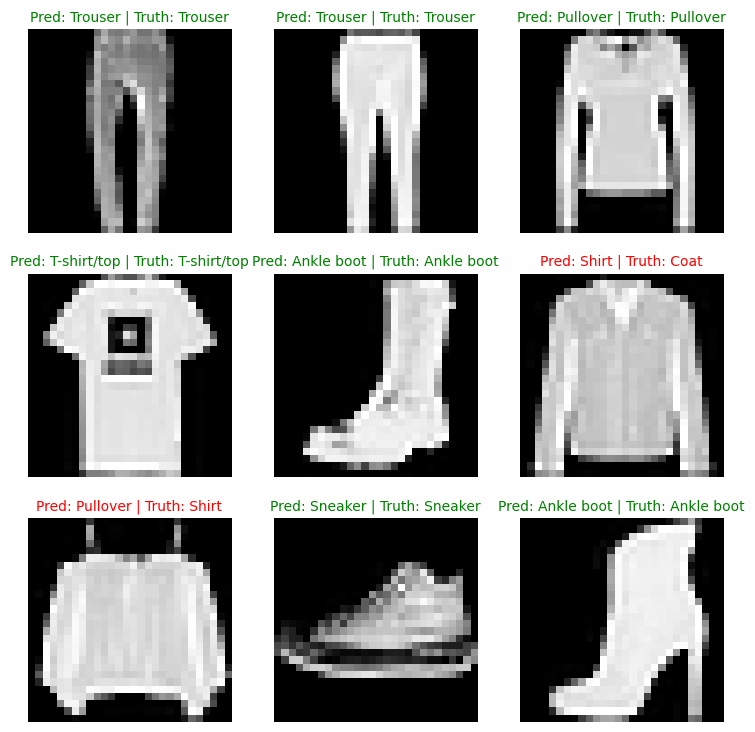

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:

# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinu

In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.1


In [ ]:
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_pred_tensor[:10]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

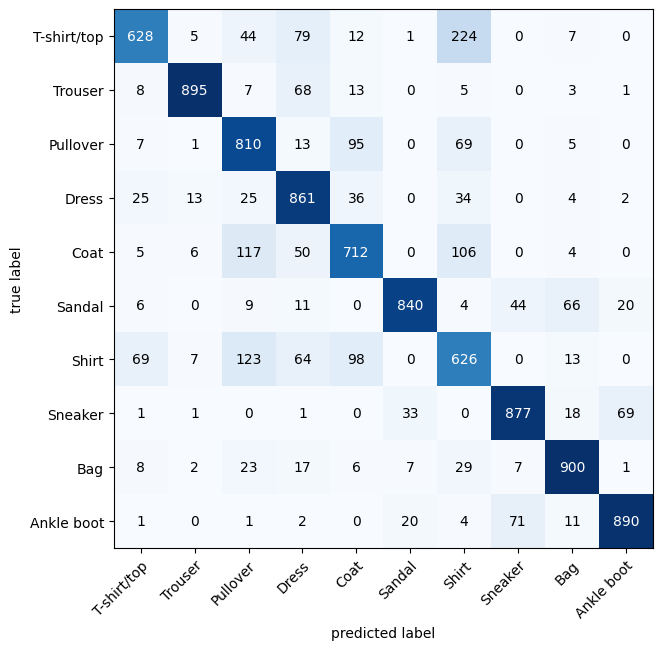

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Create confusion matrix instance with task specified
confmat = ConfusionMatrix(num_classes=len(class_names), task='MULTICLASS')

# Compare predictions to targets
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)


In [ ]:

from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:

image_shape = [1, 28, 28]

In [ ]:

# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:

# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_mode(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)

In [ ]:
#testar pipelines como no sklearn